In [1]:
# import pandas as pd

# dtypes = {'DEXUSUK': float, 'DATE': str}

# # df = pd.read_csv('./data/DEXUSEU.csv', dtype={'DEXUSEU': float}, parse_dates=['DATE'], index_col='DATE')
# # df = pd.read_csv('./data/DEXUSUK.csv', dtype={'DEXUSUK': float})
# df = pd.read_csv('./data/DEXUSUK.csv')


# # Convert DATE column to datetime and set to index
# df['DATE'] = pd.to_datetime(df['DATE'])
# df.set_index('DATE', inplace=True)

# # Attempt to convert DEXUSEU to float and backfill errors with previous values
# df['DEXUSUK'] = pd.to_numeric(df['DEXUSUK'], errors='coerce').fillna(method='ffill')

# df.info()

In [2]:
# import matplotlib.pyplot as plt

# df.resample('M').last().plot().set_title('USD/GBP Exchange Rate')
# plt.rcParams['figure.figsize'] = [32, 12]
# plt.ylim(.9, 2.2)
# plt.xlabel('Date')
# plt.ylabel('Exchange Rate')
# plt.show()

In [3]:
# url = 'https://api.stlouisfed.org/fred/series/observations?series_id=DEXUSUK&api_key=fbf2a3cac76ec733ee2b8c01ab036950&file_type=json'

In [4]:
import requests
import pandas as pd

def get_series(series_id, start, end, api_key='fbf2a3cac76ec733ee2b8c01ab036950', file_type='json'):
    url_base = 'https://api.stlouisfed.org/fred/series/observations'
    url = f'{url_base}?series_id={series_id}'
    if start is not None:
        start = pd.to_datetime(start, errors='raise')
        url += '&observation_start=' + start.strftime('%Y-%m-%d')
    if end is not None:
        end = pd.to_datetime(end, errors='raise')
        url += '&observation_end=' + end.strftime('%Y-%m-%d')
    
    url += f'&api_key={api_key}&file_type={file_type}'
    
    try:
        resp = requests.get(url)
    except  Exception as e:
        print(e)
        return None
    
    dfdict = {}
    for i in resp.json()['observations']:
        dt = pd.to_datetime(i['date'], errors='raise')
        if i['value'] != '.':
            rate = float(i['value'])
        else:
            rate = None
        dfdict[dt] = rate
        
    df = pd.DataFrame.from_dict(dfdict, orient='index', columns=[series_id])
    df.fillna(method='ffill', inplace=True)
    return df

df = get_series('DEXUSUK', '1983-01-01', '2022-12-31')
df.head()

,DEXUSUK
1983-01-03,1.6235
1983-01-04,1.6210
1983-01-05,1.6210
1983-01-06,1.6065
1983-01-07,1.6100


In [5]:
df.isna().value_counts()

DEXUSUK
False      10435
dtype: int64

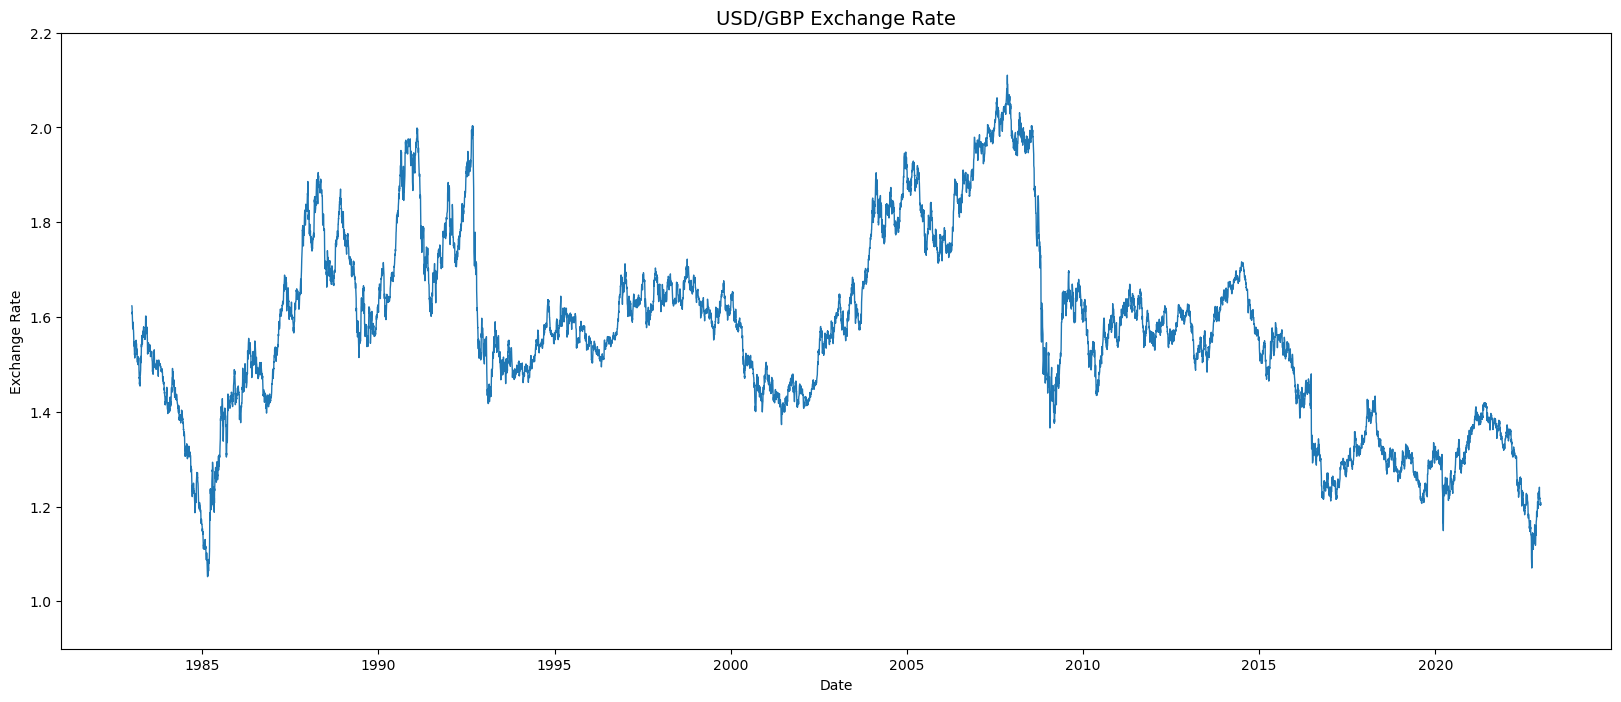

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(df.index, df.DEXUSUK, linewidth=1)
plt.title('USD/GBP Exchange Rate', fontsize=14)
plt.ylim(.9, 2.2)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [7]:
import plotly.graph_objects as go

trace = go.Scatter(x=df.index, y=df['DEXUSUK'], mode='lines')
data = [trace]
layout = {
    'title': 'USD/GBP Exchange Rate',
    'xaxis_title': 'Date',
    'yaxis_title': 'USD/GBP Rate',
    'width': 2400,
    'height': 1200,
    'hovermode': 'x unified',
    'template': 'seaborn',
    'xaxis': {
        'rangeslider': {
            'visible': True,
        },
    }
}

fig = go.Figure(data=data, layout=layout)
fig.show()

<AxesSubplot:>

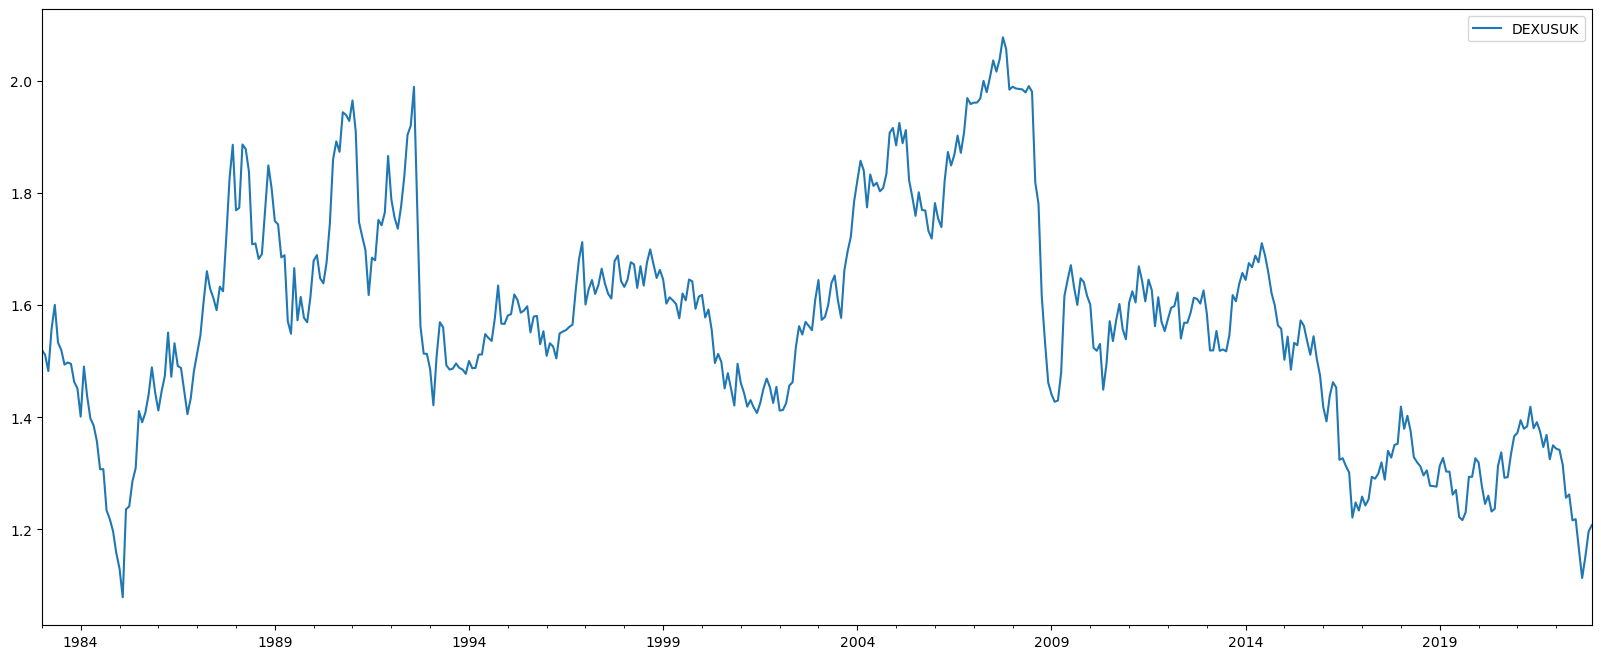

In [8]:
df.resample('M').last().plot()

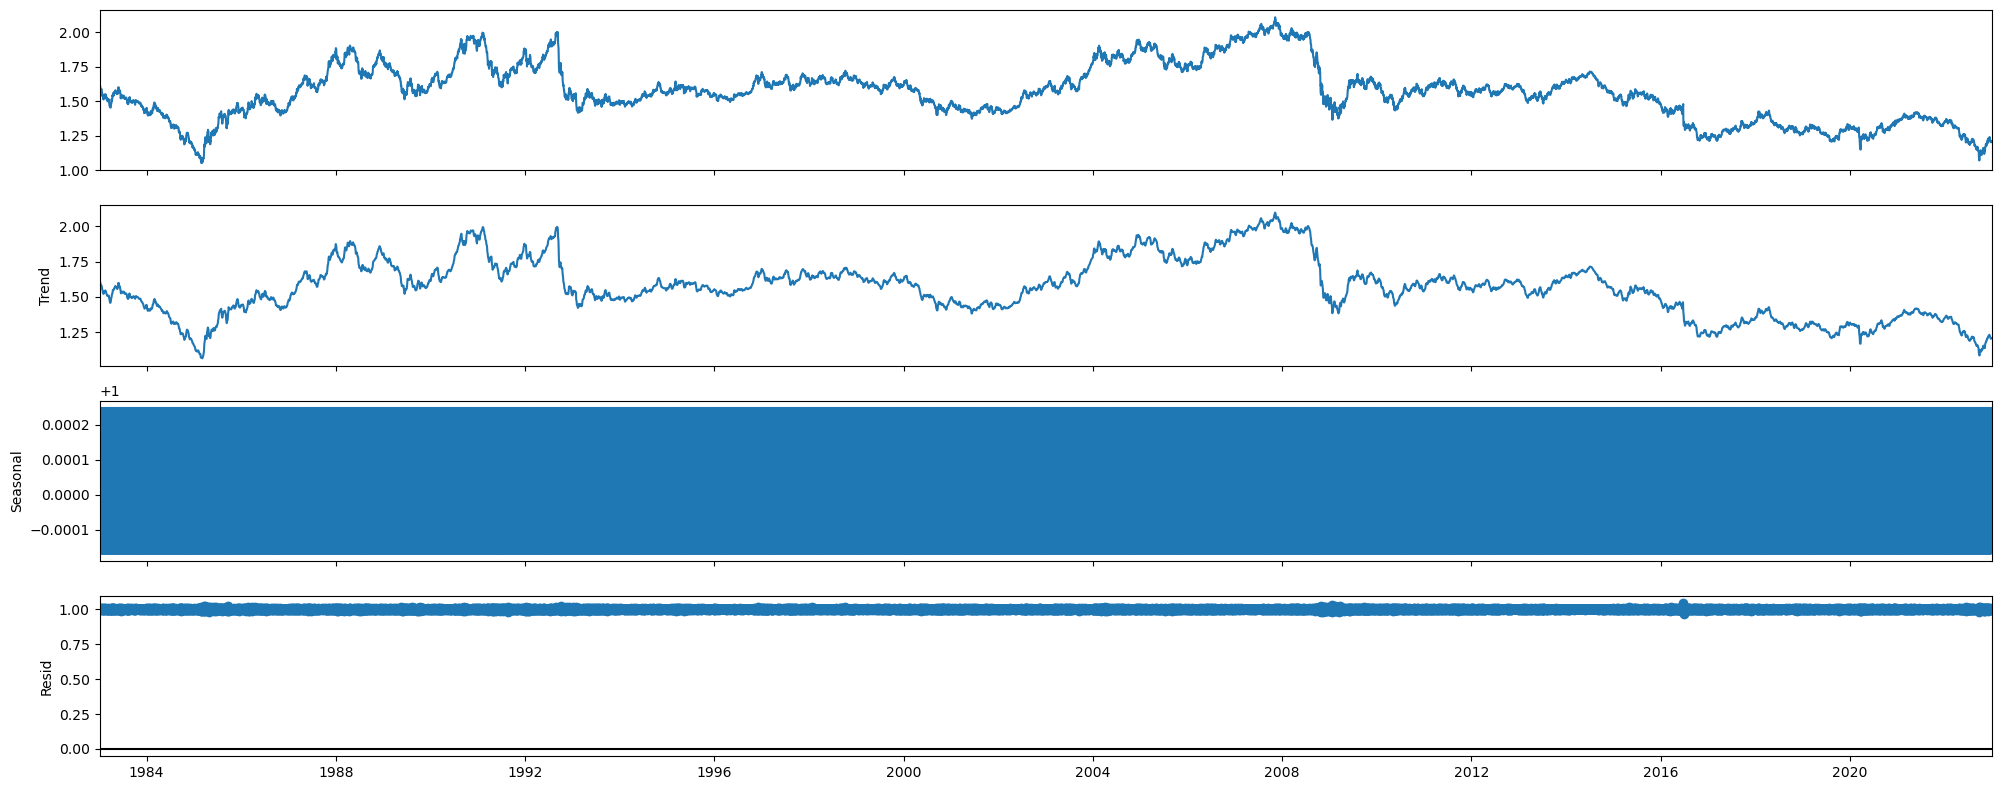

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df, model='multiplicative')
fig = decomp.plot()

<AxesSubplot:>

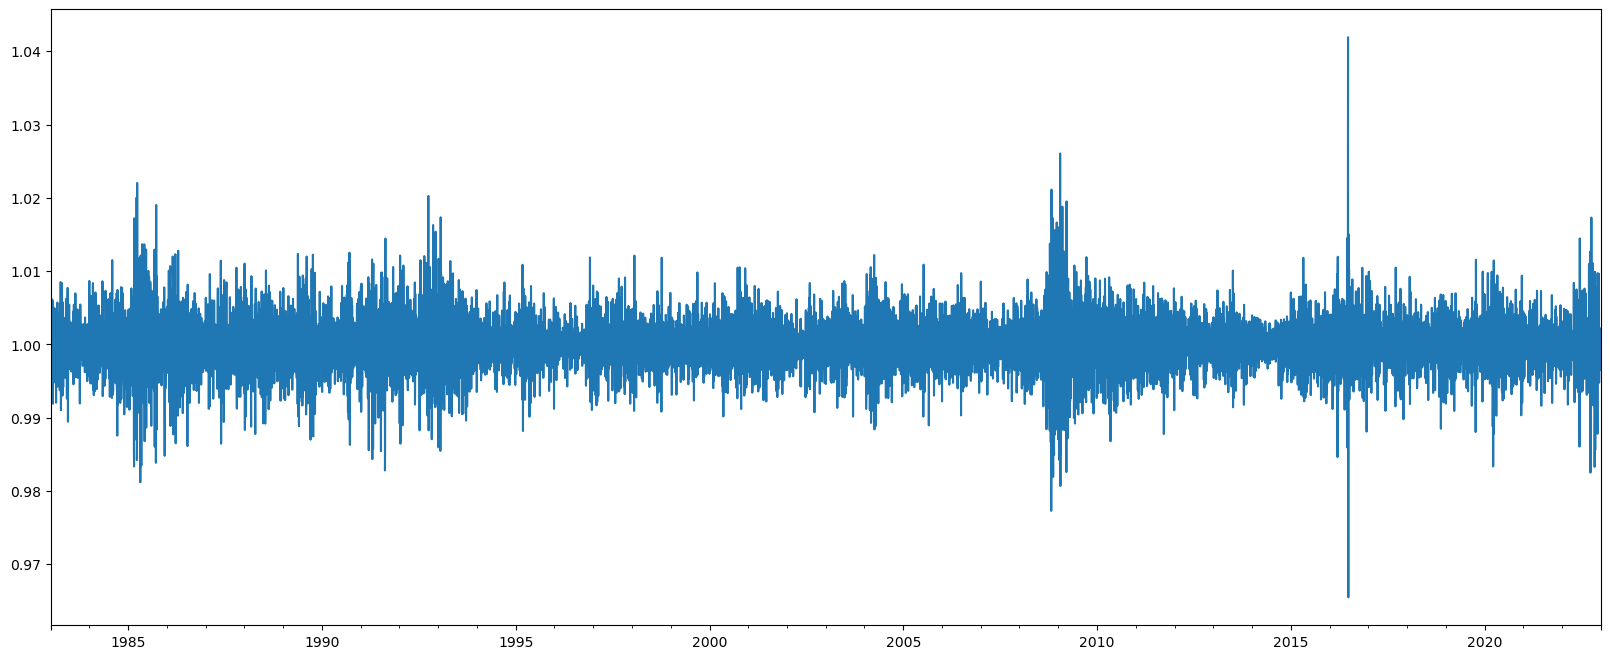

In [10]:
decomp.resid.plot()

<AxesSubplot:>

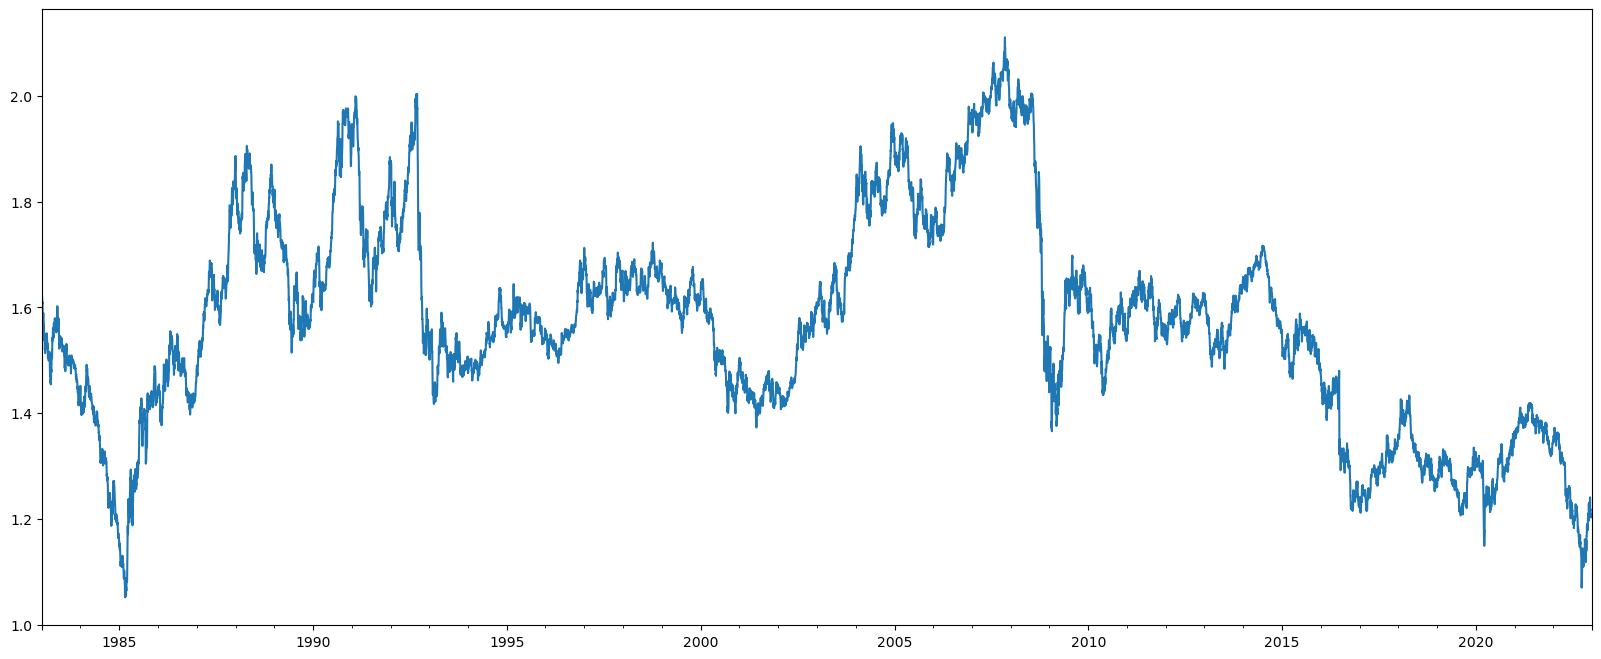

In [11]:
decomp.observed.plot()

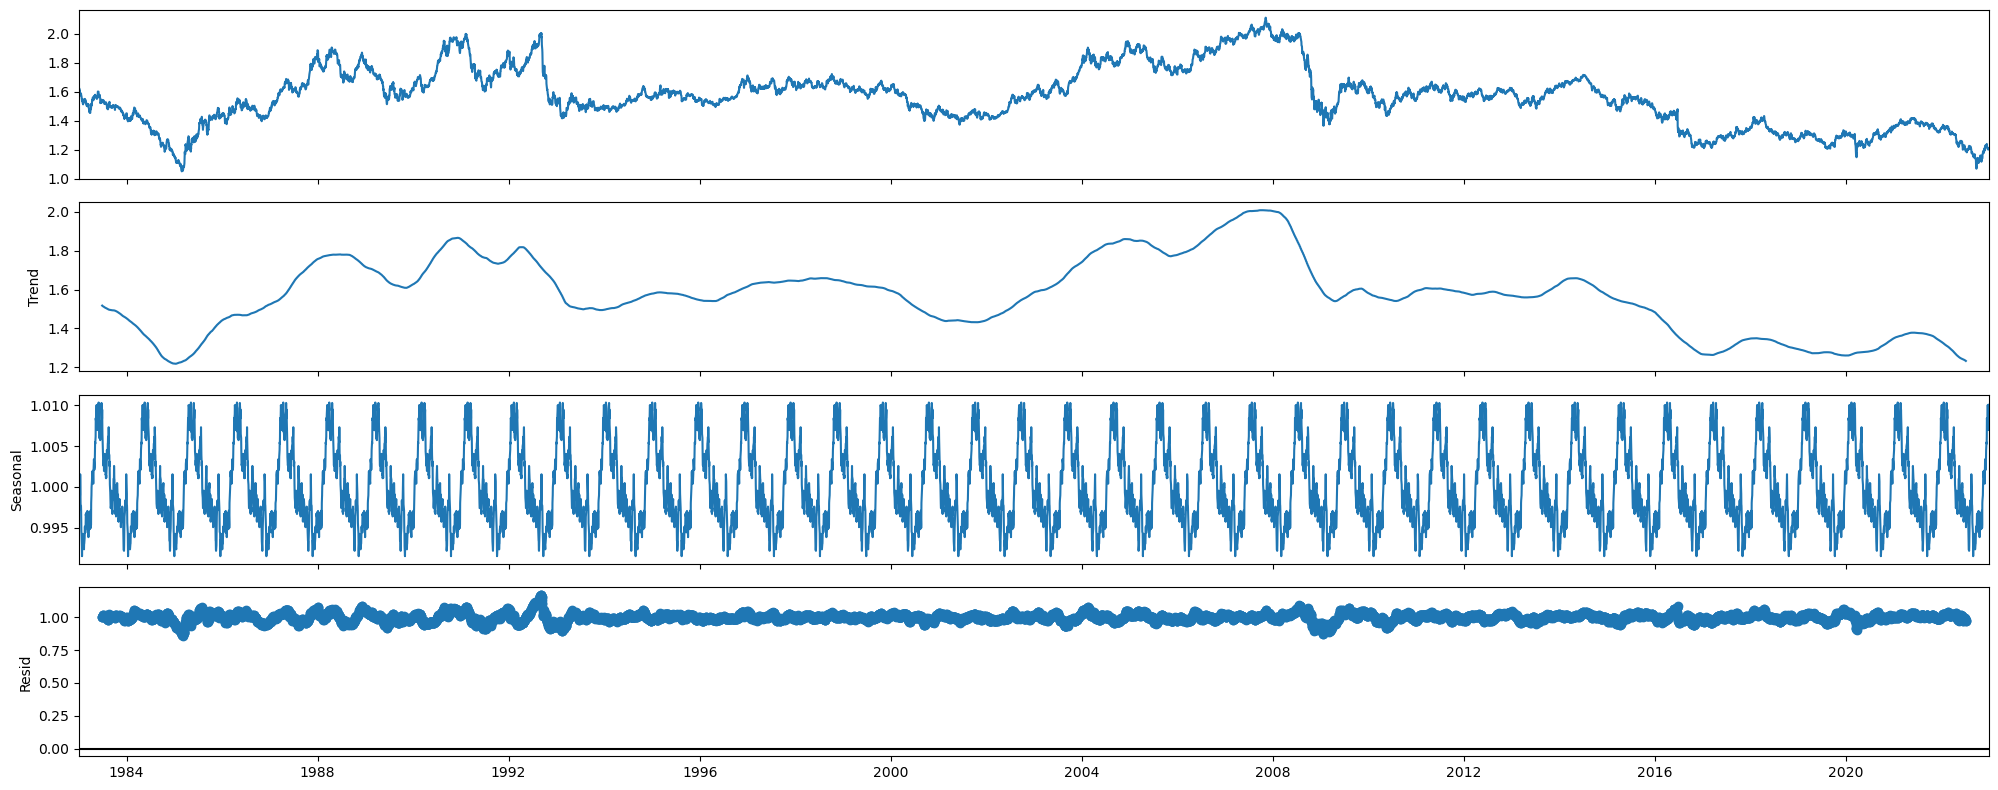

In [12]:
# decompose the data into trend, seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative', period=252)
result.plot()
plt.show()


<AxesSubplot:>

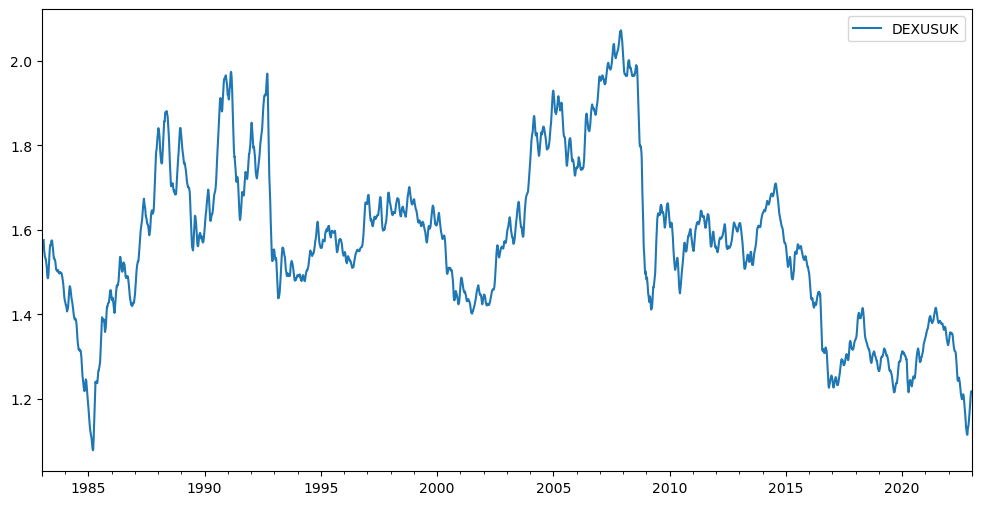

In [13]:
df.rolling(21).mean().plot(figsize=(12, 6))

In [14]:
df.diff(1)

,DEXUSUK
1983-01-03,NaN
1983-01-04,-0.0025
1983-01-05,0.0000
1983-01-06,-0.0145
1983-01-07,0.0035
...,...
2022-12-26,0.0000
2022-12-27,-0.0022
2022-12-28,0.0002
2022-12-29,0.0026


In [15]:
df - df.shift(1)

,DEXUSUK
1983-01-03,NaN
1983-01-04,-0.0025
1983-01-05,0.0000
1983-01-06,-0.0145
1983-01-07,0.0035
...,...
2022-12-26,0.0000
2022-12-27,-0.0022
2022-12-28,0.0002
2022-12-29,0.0026


In [16]:
diffed = df.diff(1)

In [17]:
diffed.value_counts()

DEXUSUK
 0.0000    481
-0.0020     87
 0.0040     85
 0.0020     83
-0.0005     78
          ... 
-0.0139      1
-0.0140      1
-0.0151      1
-0.0152      1
 0.0707      1
Length: 1027, dtype: int64

In [18]:
df

,DEXUSUK
1983-01-03,1.6235
1983-01-04,1.6210
1983-01-05,1.6210
1983-01-06,1.6065
1983-01-07,1.6100
...,...
2022-12-26,1.2054
2022-12-27,1.2032
2022-12-28,1.2034
2022-12-29,1.2060


In [19]:
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [20]:
df

,DEXUSUK
1983-01-03,1.6235
1983-01-04,1.6210
1983-01-05,1.6210
1983-01-06,1.6065
1983-01-07,1.6100
...,...
2022-12-26,1.2054
2022-12-27,1.2032
2022-12-28,1.2034
2022-12-29,1.2060


In [21]:
# df_fx_data['Date'] = pd.to_datetime(df_fx_data['Date'], format = '%Y-%m-%d')
# indexed_df = df_fx_data.set_index('Date')

indexed_df = df.copy()
indexed_df.columns = ['Value']
ts_euro = indexed_df['Value']
ts_euro.head(5)


1983-01-03    1.6235
1983-01-04    1.6210
1983-01-05    1.6210
1983-01-06    1.6065
1983-01-07    1.6100
Name: Value, dtype: float64

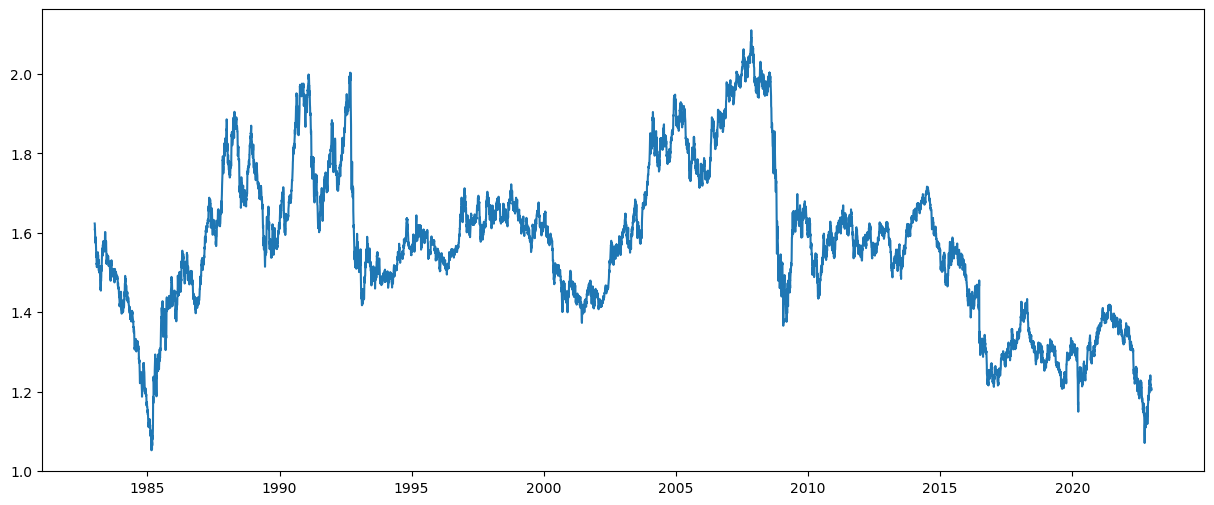

In [22]:
plt.plot(ts_euro.index.to_pydatetime(), ts_euro.values)


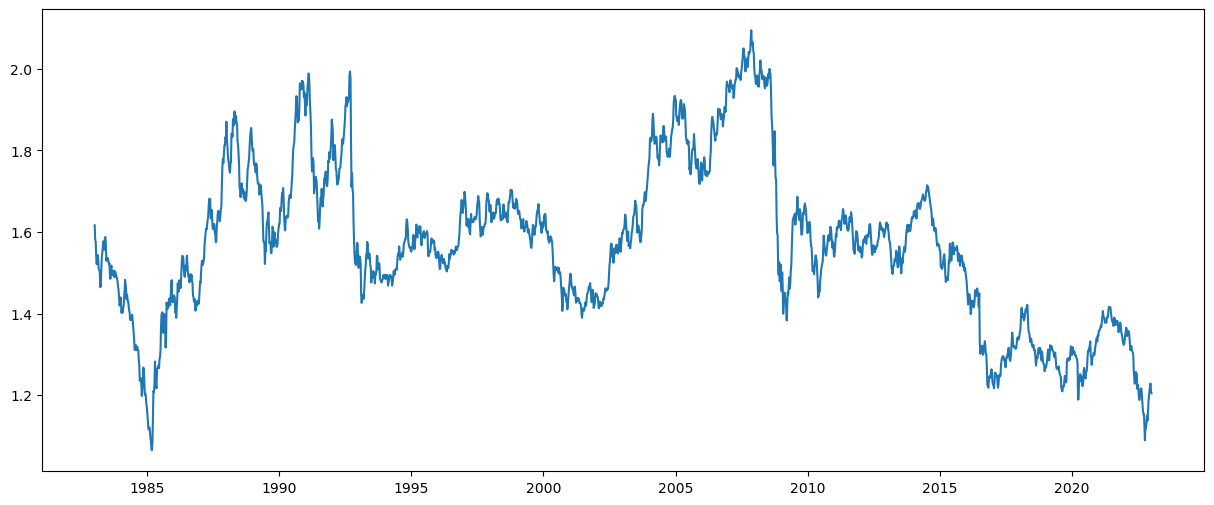

In [23]:
ts_euro_week = ts_euro.resample('W').mean()
plt.plot(ts_euro_week.index.to_pydatetime(), ts_euro_week.values)

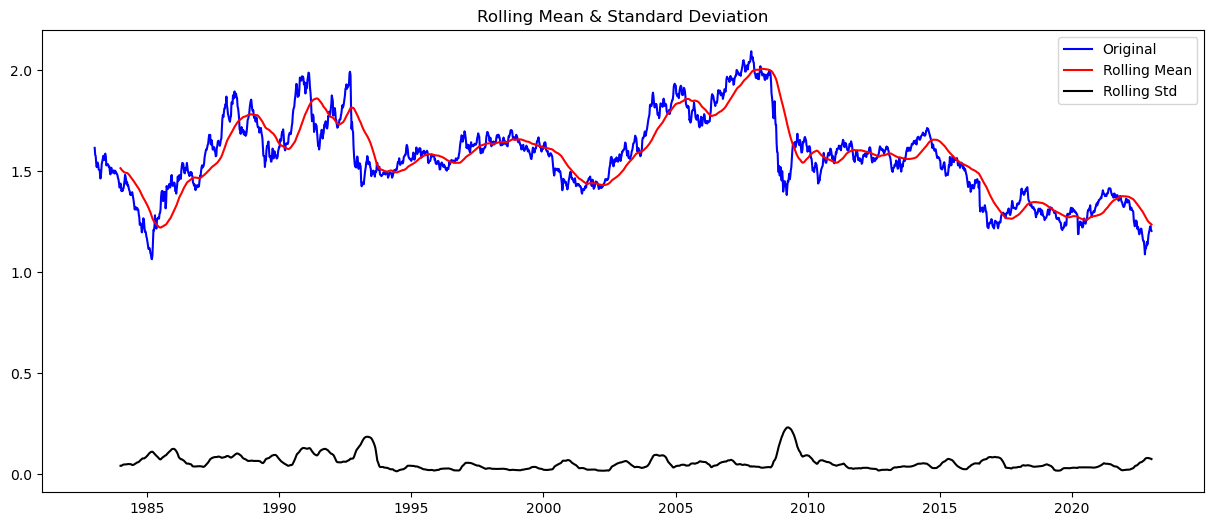

Results of Dickey-Fuller Test:
Test Statistic                   -2.319095
p-value                           0.165883
#Lags Used                        3.000000
Number of Observations Used    2083.000000
Critical Value (1%)              -3.433493
Critical Value (5%)              -2.862929
Critical Value (10%)             -2.567509
dtype: float64


In [24]:
def check_stationarity(timeseries):
    
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(window=52,center=False).mean() 
    rolling_std = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    original = plt.plot(timeseries.index.to_pydatetime(), timeseries.values, color='blue',label='Original')
    mean = plt.plot(rolling_mean.index.to_pydatetime(), rolling_mean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std.index.to_pydatetime(), rolling_std.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dickey_fuller_test = adfuller(timeseries, autolag='AIC')
    dfresults = pd.Series(dickey_fuller_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dickey_fuller_test[4].items():
        dfresults['Critical Value (%s)'%key] = value
    print (dfresults)
check_stationarity(ts_euro_week)


In [30]:
# Resample the ts_euro series to weekly frequency where week ends on Friday taking the last value of the week

ts_euro_weekly = ts_euro.resample('W-FRI').last()


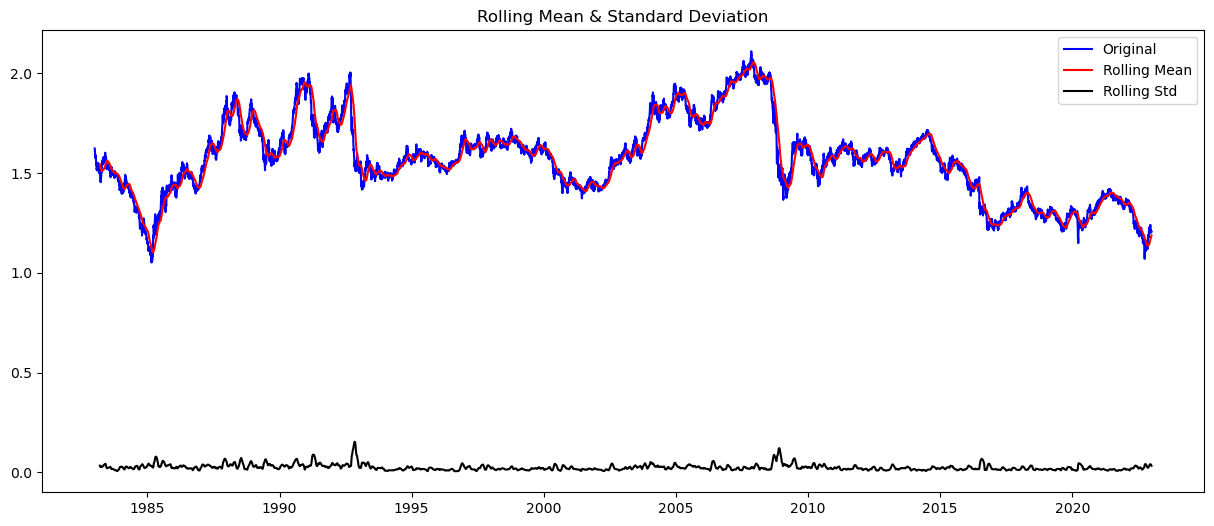

Results of Dickey-Fuller Test:
Test Statistic                    -2.270853
p-value                            0.181541
#Lags Used                         1.000000
Number of Observations Used    10433.000000
Critical Value (1%)               -3.430977
Critical Value (5%)               -2.861817
Critical Value (10%)              -2.566917
dtype: float64


In [32]:
check_stationarity(ts_euro)

In [ ]:
ts_euro_week_log = np.log(ts_euro_week)
check_stationarity(ts_euro_week_log)
decomposition = seasonal_decompose(ts_euro_week)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Select the most recent weeks 
ts_euro_week_log_select = ts_euro_week_log[-100:]

plt.subplot(411)
plt.plot(ts_euro_week_log_select.index.to_pydatetime(), ts_euro_week_log_select.values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_euro_week_log_select.index.to_pydatetime(), trend[-100:].values, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_euro_week_log_select.index.to_pydatetime(), seasonal[-100:].values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_euro_week_log_select.index.to_pydatetime(), residual[-100:].values, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
ts_euro_week_log_diff = ts_euro_week_log - ts_euro_week_log.shift()
plt.plot(ts_euro_week_log_diff.index.to_pydatetime(), ts_euro_week_log_diff.values)
ts_euro_week_log_diff.dropna(inplace=True)
check_stationarity(ts_euro_week_log_diff)
#ACF and PACF plots

lag_auto_corr = acf(ts_euro_week_log_diff, nlags=10)
lag_par_auto_corr = pacf(ts_euro_week_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_euro_week_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts_euro_week_log_diff)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_par_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_euro_week_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts_euro_week_log_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
model = ARIMA(ts_euro_week_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
model = ARIMA(ts_euro_week_log, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_euro_week_log_diff.index.to_pydatetime(), ts_euro_week_log_diff.values)
plt.plot(ts_euro_week_log_diff.index.to_pydatetime(), results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_euro_week_log_diff)**2))
print(results_ARIMA.summary())
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())
euro_predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (euro_predictions_ARIMA_diff.head())
euro_predictions_ARIMA_diff_cumsum = euro_predictions_ARIMA_diff.cumsum()
euro_predictions_ARIMA_log = pd.Series(ts_euro_week_log.iloc[0], index=ts_euro_week_log.index)
euro_predictions_ARIMA_log = euro_predictions_ARIMA_log.add(euro_predictions_ARIMA_diff_cumsum,fill_value=0)
euro_predictions_ARIMA = np.exp(euro_predictions_ARIMA_log)
plt.plot(ts_euro_week.index.to_pydatetime(), ts_euro_week.values)
plt.plot(ts_euro_week.index.to_pydatetime(), euro_predictions_ARIMA.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((euro_predictions_ARIMA-ts_euro_week)**2)/len(ts_euro_week)))

size = int(len(ts_euro_week_log) - 15)
train, test = ts_euro_week_log[0:size], ts_euro_week_log[size:len(ts_euro_week_log)]
historical = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(historical, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    observed = test[t]
    historical.append(observed)
    print('Predicted Euro Rate = %f, Expected Euro Rate = %f' % (np.exp(yhat), np.exp(observed)))

error = mean_squared_error(test, predictions)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

euro_predictions_series = pd.Series(predictions, index = test.index)

fig, ax = plt.subplots()
ax.set(title='Spot Exchange Rate, Euro into USD', xlabel='Date', ylabel='Euro into USD')
ax.plot(ts_euro_week[-50:], 'o', label='observed')
ax.plot(np.exp(euro_predictions_series), 'g', label='rolling one-step out-of-sample forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')








In [ ]:
from pmdarima.arima import auto_arima

arimafit = auto_arima(df['DEXUSUK'], trace)